In [ ]:
!mkdir images
%cd images
!wget https://img.wongnai.com/p/400x0/2021/02/20/c89967d54f6c4ecf948730ccf6f2ab90.jpg
%cd ..

/content/images
--2025-07-10 16:20:48--  https://img.wongnai.com/p/400x0/2021/02/20/c89967d54f6c4ecf948730ccf6f2ab90.jpg
Resolving img.wongnai.com (img.wongnai.com)... 104.18.31.116, 104.18.30.116
Connecting to img.wongnai.com (img.wongnai.com)|104.18.31.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17891 (17K) [image/jpeg]
Saving to: ‘c89967d54f6c4ecf948730ccf6f2ab90.jpg’

c89967d54f6c4ecf948 100%[===================>]  17.47K  --.-KB/s    in 0s      

2025-07-10 16:20:48 (98.3 MB/s) - ‘c89967d54f6c4ecf948730ccf6f2ab90.jpg’ saved [17891/17891]

/content


# **Lab2.2 : Image Enhancement with Statistical Operation**

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

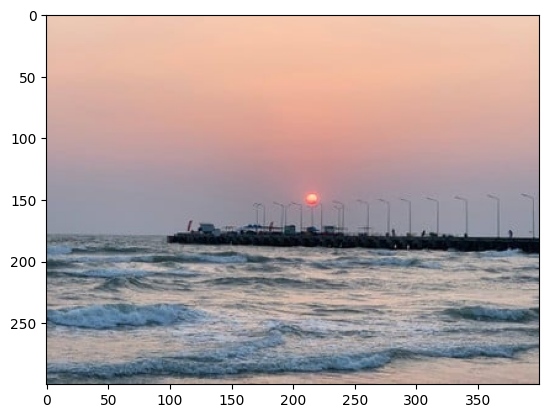

In [ ]:
### START CODE HERE ###
img = cv2.imread("/content/images/c89967d54f6c4ecf948730ccf6f2ab90.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [ ]:
### START CODE HERE ###
def plot_histogram(image):
    hist = [cv2.calcHist([image],[i],None,[256],[0,256]) for i in range(3)]
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

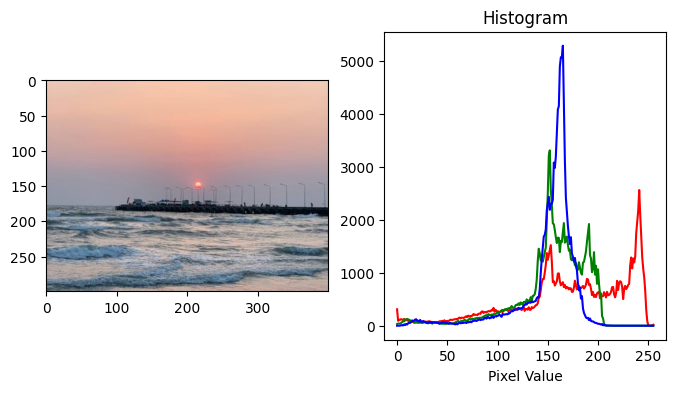

In [ ]:
### START CODE HERE ###
hist = plot_histogram(img)

fig, ax = plt.subplots(1, 2, figsize=(8, 4)) # Changed figsize

ax[0].imshow(img)
colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    ax[1].plot(hist[i], color=col)
ax[1].set_title("Histogram")
ax[1].set_xlabel("Pixel Value")

plt.show()
### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

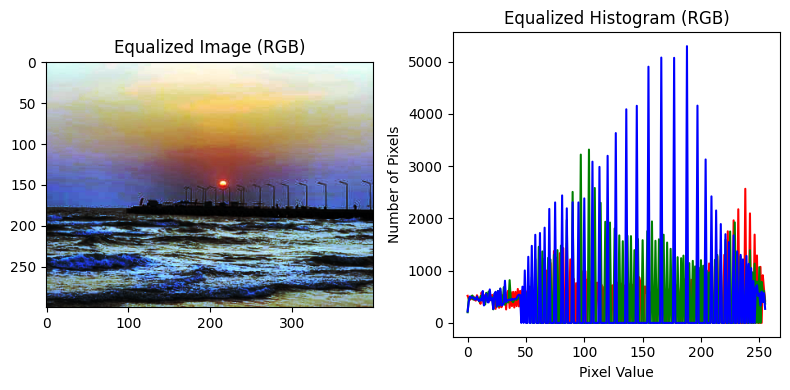

In [ ]:
### START CODE HERE ###
# Split the image into R, G, B channels
r, g, b = cv2.split(img)

# Equalize the histogram of each channel
b_equalized = cv2.equalizeHist(b)
g_equalized = cv2.equalizeHist(g)
r_equalized = cv2.equalizeHist(r)

# Merge the equalized channels back
img_equalized_rgb = cv2.merge((r_equalized, g_equalized, b_equalized))

# Calculate the histogram of the equalized RGB image
hist_equalized_rgb = plot_histogram(img_equalized_rgb)

# Display the equalized image and its histogram
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(img_equalized_rgb)
axes[0].set_title("Equalized Image (RGB)")

colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    axes[1].plot(hist_equalized_rgb[i], color=col)
axes[1].set_title("Equalized Histogram (RGB)")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Number of Pixels")

plt.tight_layout()
plt.show()
### END CODE HERE ###

In [ ]:
%cd images
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/960px-Tsunami_by_hokusai_19th_century.jpg
%cd ..

/content/images
--2025-07-10 16:21:09--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/960px-Tsunami_by_hokusai_19th_century.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255087 (249K) [image/jpeg]
Saving to: ‘960px-Tsunami_by_hokusai_19th_century.jpg’

960px-Tsunami_by_ho 100%[===================>] 249.11K  --.-KB/s    in 0.02s   

2025-07-10 16:21:09 (14.5 MB/s) - ‘960px-Tsunami_by_hokusai_19th_century.jpg’ saved [255087/255087]

/content


## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [ ]:
### START CODE HERE ###


img2 = cv2.imread("/content/images/960px-Tsunami_by_hokusai_19th_century.jpg")
img1 = cv2.imread("/content/images/c89967d54f6c4ecf948730ccf6f2ab90.jpg")


### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

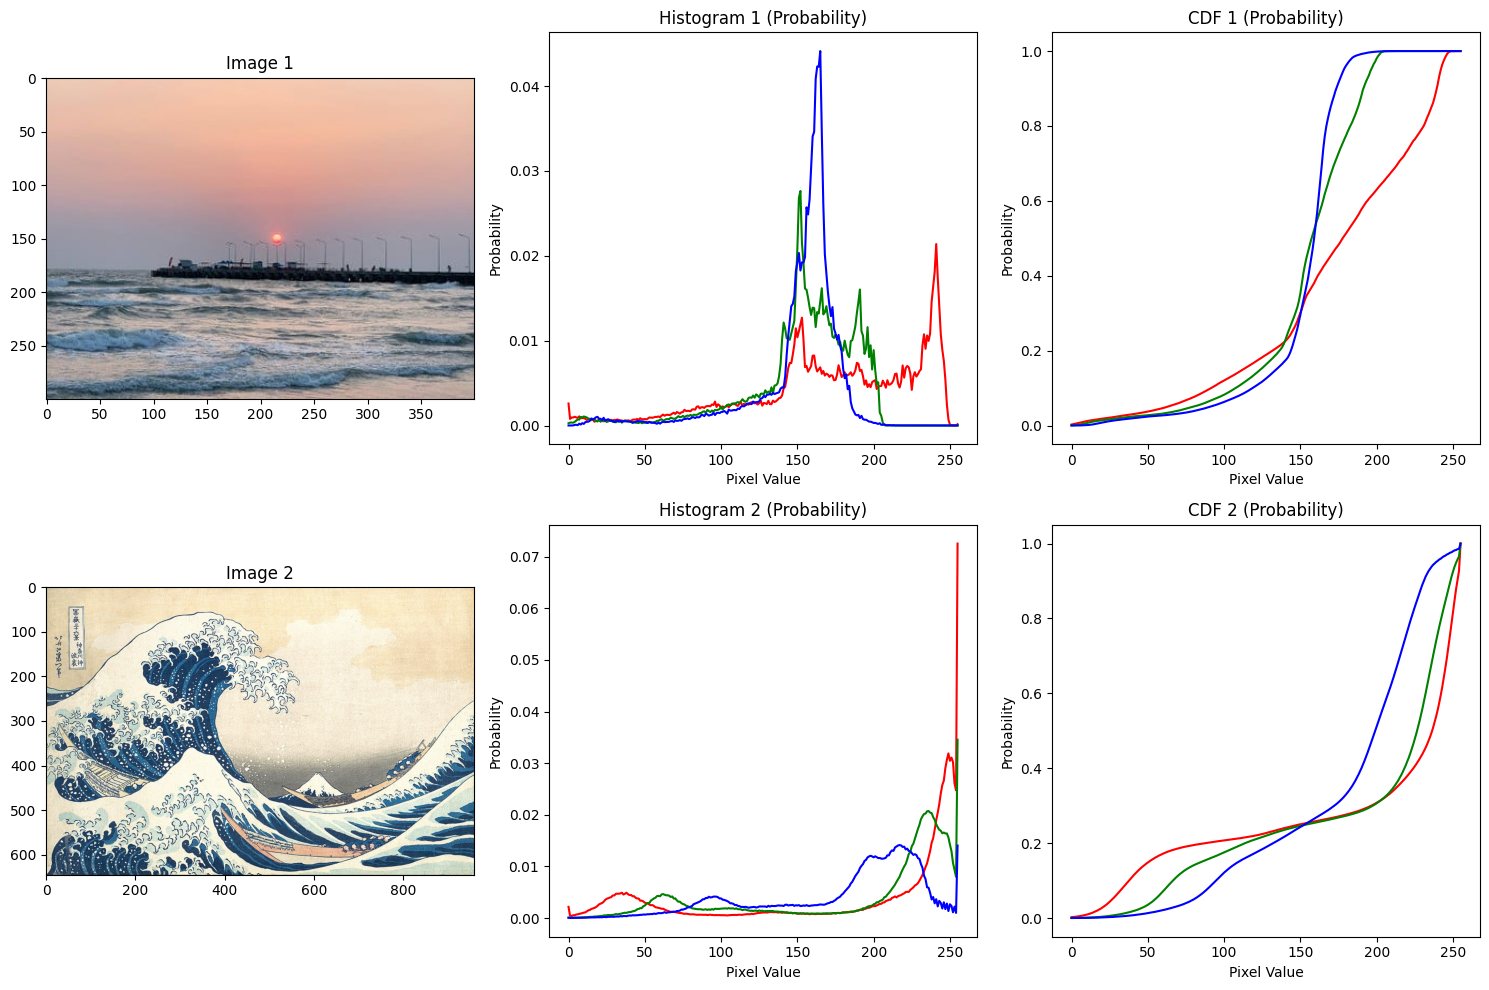

In [ ]:
### START CODE HERE ###
def plot_histogram_normalized(image):
    hist = [cv2.calcHist([image],[i],None,[256],[0,256]) for i in range(3)]
    # Normalize histograms to represent probability
    hist_normalized = [h / h.sum() for h in hist]
    return hist_normalized

def plot_cdf_normalized(hist):
    cdf = hist.cumsum()
    # Normalize CDF to range from 0 to 1
    cdf_normalized = cdf / cdf.max()
    return cdf_normalized

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

hist1_normalized = plot_histogram_normalized(img1_rgb)
hist2_normalized = plot_histogram_normalized(img2_rgb)

cdf1_normalized = [plot_cdf_normalized(h) for h in hist1_normalized]
cdf2_normalized = [plot_cdf_normalized(h) for h in hist2_normalized]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Image 1
axes[0, 0].imshow(img1_rgb)
axes[0, 0].set_title("Image 1")

colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    axes[0, 1].plot(hist1_normalized[i], color=col)
axes[0, 1].set_title("Histogram 1 (Probability)")
axes[0, 1].set_xlabel("Pixel Value")
axes[0, 1].set_ylabel("Probability")

for i, col in enumerate(colors):
    axes[0, 2].plot(cdf1_normalized[i], color=col)
axes[0, 2].set_title("CDF 1 (Probability)")
axes[0, 2].set_xlabel("Pixel Value")
axes[0, 2].set_ylabel("Probability")

# Image 2
axes[1, 0].imshow(img2_rgb)
axes[1, 0].set_title("Image 2")

for i, col in enumerate(colors):
    axes[1, 1].plot(hist2_normalized[i], color=col)
axes[1, 1].set_title("Histogram 2 (Probability)")
axes[1, 1].set_xlabel("Pixel Value")
axes[1, 1].set_ylabel("Probability")

for i, col in enumerate(colors):
    axes[1, 2].plot(cdf2_normalized[i], color=col)
axes[1, 2].set_title("CDF 2 (Probability)")
axes[1, 2].set_xlabel("Pixel Value")
axes[1, 2].set_ylabel("Probability")


plt.tight_layout()
plt.show()
### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

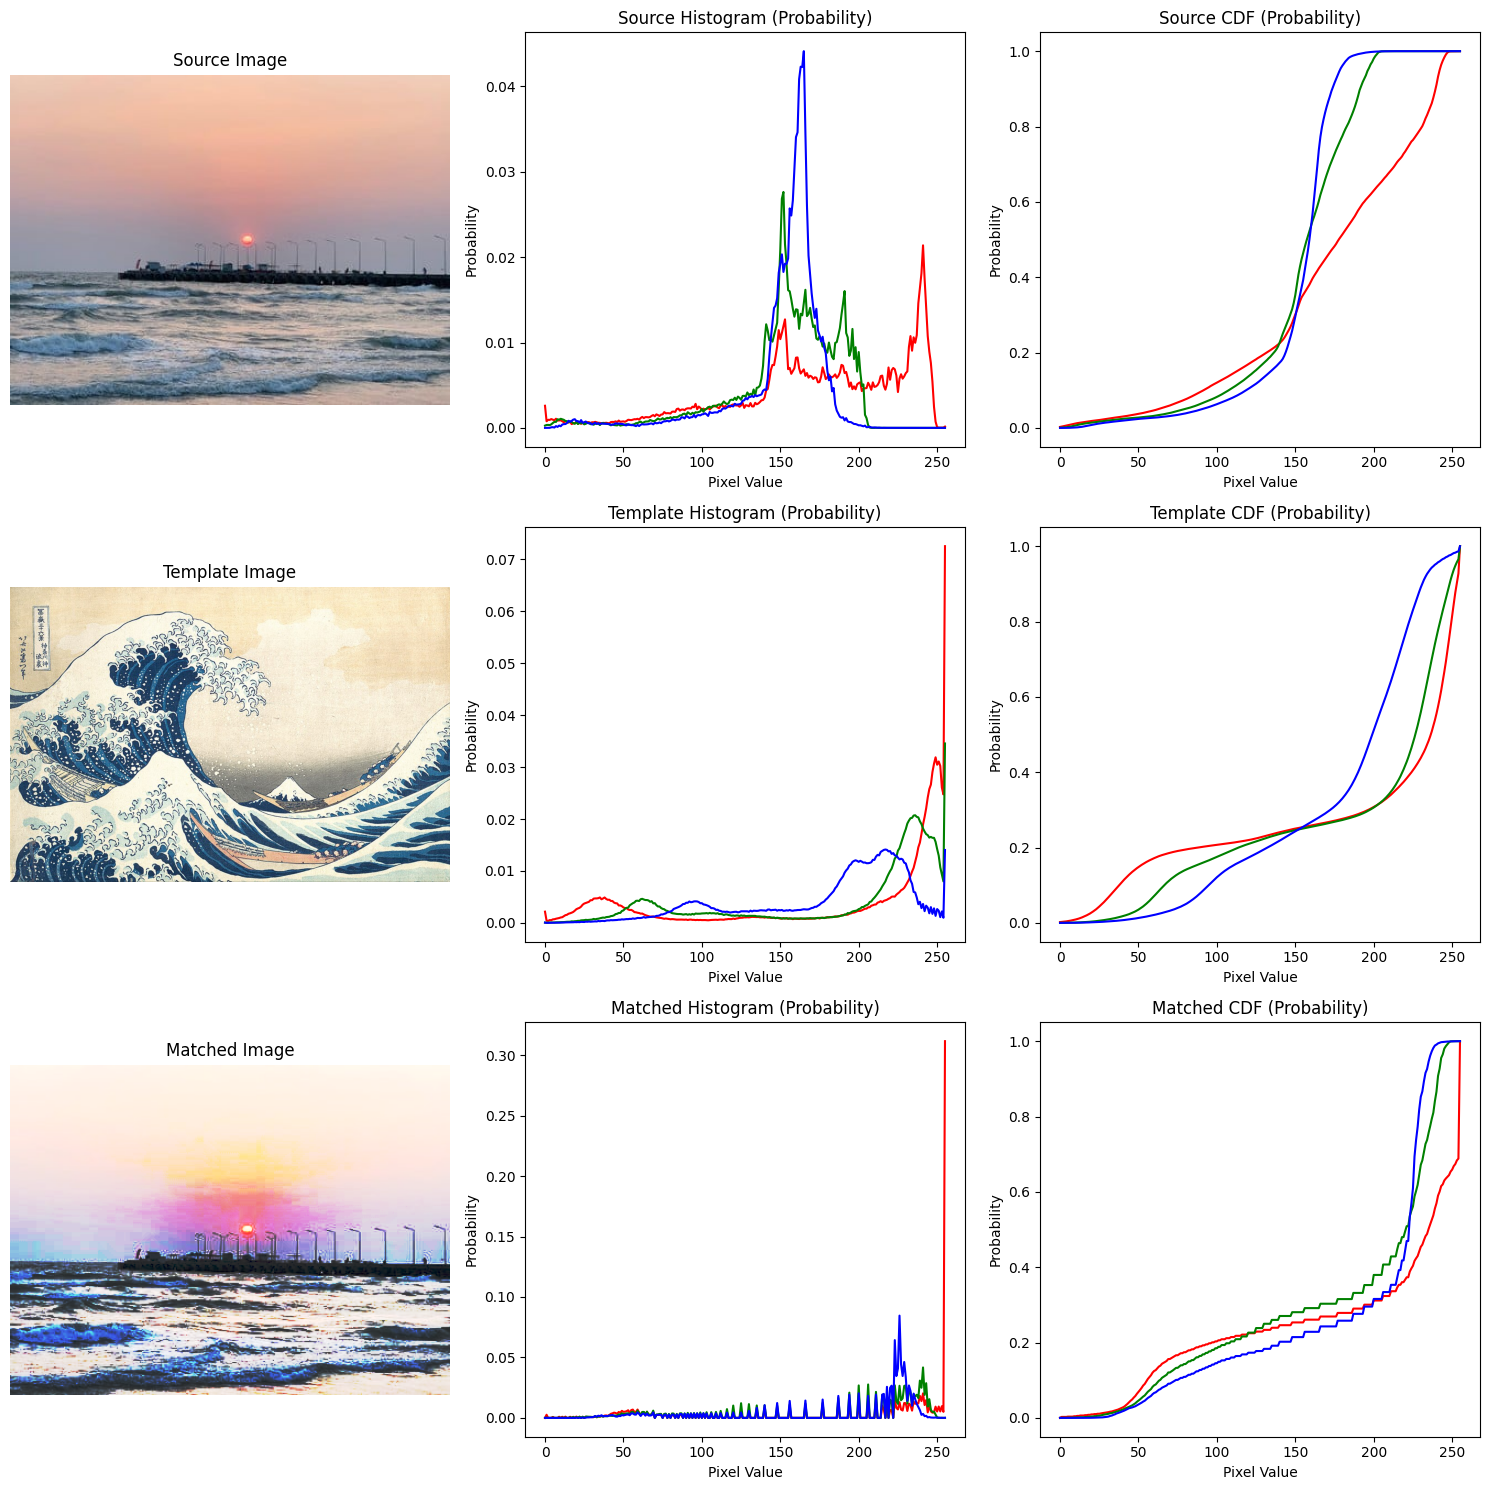

In [ ]:
### START CODE HERE ###
def histogram_matching(source_img, template_img):
    # Convert images to grayscale
    source_gray = cv2.cvtColor(source_img, cv2.COLOR_RGB2GRAY)
    template_gray = cv2.cvtColor(template_img, cv2.COLOR_RGB2GRAY)

    # Calculate histograms
    hist_source = cv2.calcHist([source_gray], [0], None, [256], [0, 256])
    hist_template = cv2.calcHist([template_gray], [0], None, [256], [0, 256])

    # Normalize histograms
    hist_source_normalized = hist_source / hist_source.sum()
    hist_template_normalized = hist_template / hist_template.sum()

    # Calculate CDFs
    cdf_source = hist_source_normalized.cumsum()
    cdf_template = hist_template_normalized.cumsum()

    # Create a mapping function
    mapping = np.zeros(256, dtype=np.uint8)
    j = 0
    for i in range(256):
        while j < 255 and cdf_template[j] < cdf_source[i]:
            j += 1
        mapping[i] = j

    # Apply mapping to the source image channels
    matched_img = np.zeros_like(source_img)
    for i in range(3):
        matched_img[:, :, i] = cv2.LUT(source_img[:, :, i], mapping)

    return matched_img

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img_matched = histogram_matching(img1_rgb, img2_rgb)

hist1_normalized = plot_histogram_normalized(img1_rgb)
hist2_normalized = plot_histogram_normalized(img2_rgb)
hist_matched_normalized = plot_histogram_normalized(img_matched)

cdf1_normalized = [plot_cdf_normalized(h) for h in hist1_normalized]
cdf2_normalized = [plot_cdf_normalized(h) for h in hist2_normalized]
cdf_matched_normalized = [plot_cdf_normalized(h) for h in hist_matched_normalized]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Image 1 (Source)
axes[0, 0].imshow(img1_rgb)
axes[0, 0].set_title("Source Image")
axes[0, 0].axis('off')

colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    axes[0, 1].plot(hist1_normalized[i], color=col)
axes[0, 1].set_title("Source Histogram (Probability)")
axes[0, 1].set_xlabel("Pixel Value")
axes[0, 1].set_ylabel("Probability")

for i, col in enumerate(colors):
    axes[0, 2].plot(cdf1_normalized[i], color=col)
axes[0, 2].set_title("Source CDF (Probability)")
axes[0, 2].set_xlabel("Pixel Value")
axes[0, 2].set_ylabel("Probability")

# Image 2 (Template)
axes[1, 0].imshow(img2_rgb)
axes[1, 0].set_title("Template Image")
axes[1, 0].axis('off')

for i, col in enumerate(colors):
    axes[1, 1].plot(hist2_normalized[i], color=col)
axes[1, 1].set_title("Template Histogram (Probability)")
axes[1, 1].set_xlabel("Pixel Value")
axes[1, 1].set_ylabel("Probability")

for i, col in enumerate(colors):
    axes[1, 2].plot(cdf2_normalized[i], color=col)
axes[1, 2].set_title("Template CDF (Probability)")
axes[1, 2].set_xlabel("Pixel Value")
axes[1, 2].set_ylabel("Probability")

# Matched Image
axes[2, 0].imshow(img_matched)
axes[2, 0].set_title("Matched Image")
axes[2, 0].axis('off')

for i, col in enumerate(colors):
    axes[2, 1].plot(hist_matched_normalized[i], color=col)
axes[2, 1].set_title("Matched Histogram (Probability)")
axes[2, 1].set_xlabel("Pixel Value")
axes[2, 1].set_ylabel("Probability")

for i, col in enumerate(colors):
    axes[2, 2].plot(cdf_matched_normalized[i], color=col)
axes[2, 2].set_title("Matched CDF (Probability)")
axes[2, 2].set_xlabel("Pixel Value")
axes[2, 2].set_ylabel("Probability")


plt.tight_layout()
plt.show()
### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?